## Opening and interacting with Jupyter
We will explore the Jupyter notebook. 
Lets begin by understanding command mode.

Lets navigate to an empty cell (thats what these boxes are called). Now hit `esc`. What happens? The cell border turns blue. We are now in __command__ mode, where we can execute commands. Now hit `Enter` or `Return`. What happens? The border turns green. We are now in __edit__ mode. Notice the pencil in the upper right hand part of the screen. This is another clue.

 Let's enter __command__ mode again. Press `h` to pull up the help menu. This will display common operations and their corresponding shortcuts. Lets try some simple commands to create new cells and navigate. To create a cell below your existing cell enter __command__ mode and press `b`. An easy mnemonic to remember this is b=below. To create a cell above, its `a`.

Now let's try navigating. Make sure we are still in __command__ mode. Press `j` to move down a cell. Press `k` to move back up. No good mnemonic here, but users of the VI or VIM editors may be familiar. 

Finally let's try deleting a cell. Create a new cell anywhere (above or below). Navigate to that cell. Now delete it by ensuring you are in __command__ mode and typing `dd`. 

Now we're moving! Lets try adding some content to one of our cells. A good thing about Jupyter is you don't just add code, you can add notes too! Lets try that now, see if you can replicate the following:

## Hello World
This is my first Jupyter markdown

Now let's try to run some Python code! Don't worry if you don't understand the meaning of what you are doing, that will become clear soon! Lets create a new cell under the Hello World markdown cell. Now lets toggle the __Code__ cell type by entering __command__ mode and hitting `y`. 

In [1]:
print('Hello World!')

Hello World!


Now you know everything to start programming in Python ... lets get started!

## Introducing Pandas
The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

## Data Visualization in Python
And now the reason we are all here...plotting!

In [2]:
# Import matlplotlib plotting library
import matplotlib.pyplot as plt

In [3]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

Text(0, 0.5, 'Position (km)')

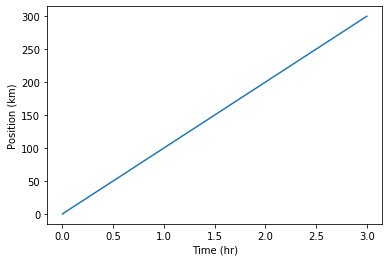

In [4]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

In [5]:
import pandas as pd
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Lets clean the dates up

In [6]:
#Extract the year from the last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')

In [7]:
data.columns = years
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Text(0.5, 0, 'Year')

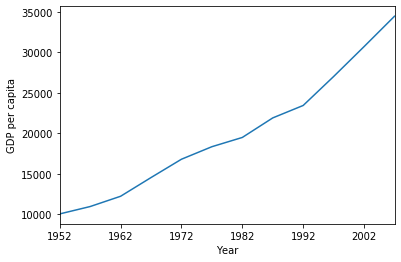

In [8]:
data.loc['Australia'].plot()
plt.ylabel('GDP per capita')
plt.xlabel('Year')

Now by default DataFrame.plot will plot the rows as the x axis. So in this case the rows are the countries Australia and New Zealand.

In [9]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


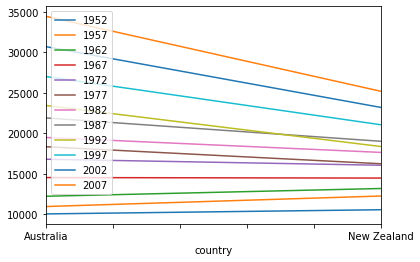

In [10]:
data.plot()

Not quite what we were looking for. Lets take the transpose of the data, switching the row and column information. 

In [11]:
data.T

country,Australia,New Zealand
1952,10039.59564,10556.57566
1957,10949.64959,12247.39532
1962,12217.22686,13175.67800
1967,14526.12465,14463.91893
1972,16788.62948,16046.03728
1977,18334.19751,16233.71770
1982,19477.00928,17632.41040
1987,21888.88903,19007.19129
1992,23424.76683,18363.32494
1997,26997.93657,21050.41377


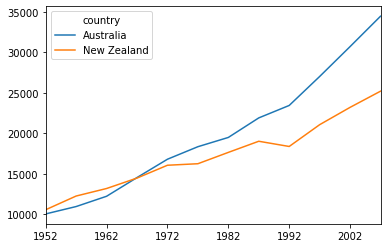

In [12]:
data.T.plot()

Up until now we have been working with simple data, using the base Python plotting package. 

## Maybe its time for a library!
Let's try the Seaborn library.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Let's bring in some gapminder data with some more variables. We can load csv's from the local filesystem, but we can load them from the web as well!

In [13]:
# Save the URL of the csv file
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)

In [14]:
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


### So now we have population and life expectancy as additional variables. Let's see how we can visualize those.

In [15]:
import seaborn as sns

### How does life expectancy change by Country? Lets use a categorical plot to visualize:

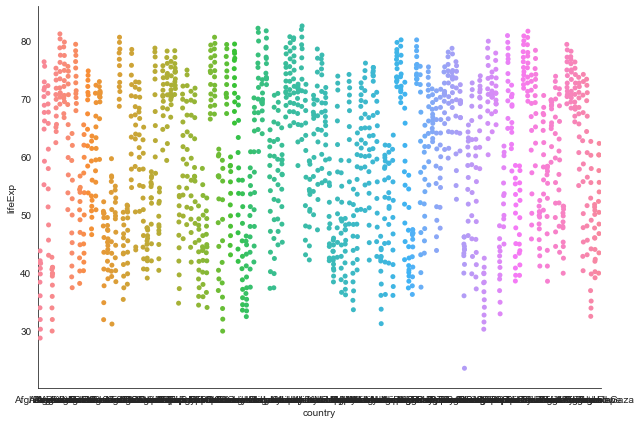

In [16]:
sns.set_style("white")
sns.catplot(x='country', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5)

### That's overwhelming, maybe we can think of a better way to summarize the data. How about by continent?

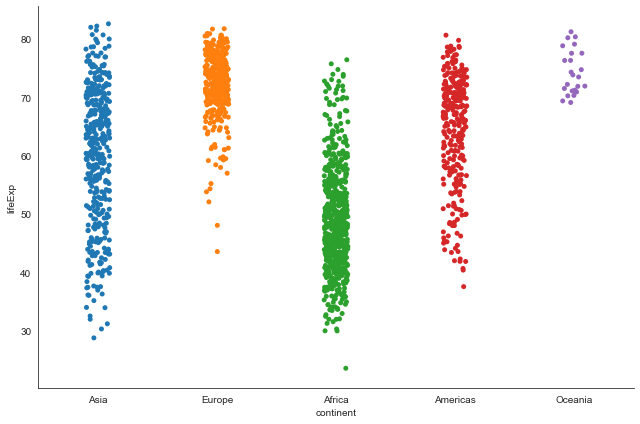

In [17]:
sns.set_style("white")
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5)

### Much better, but that does not look colorblind friendly. Lets choose a better color pallete.

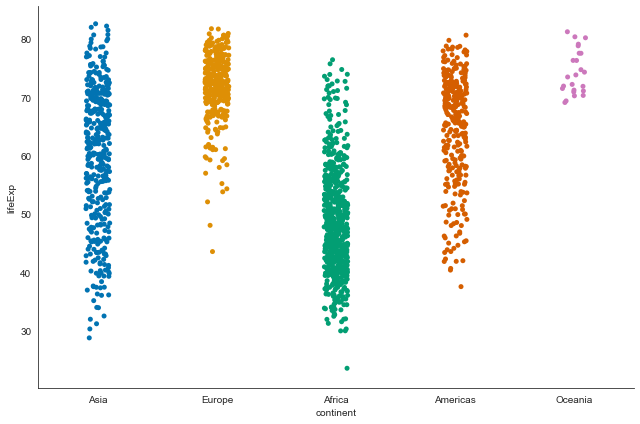

In [18]:
sns.set_palette('colorblind')
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5)

### That's better, but those fonts are too small

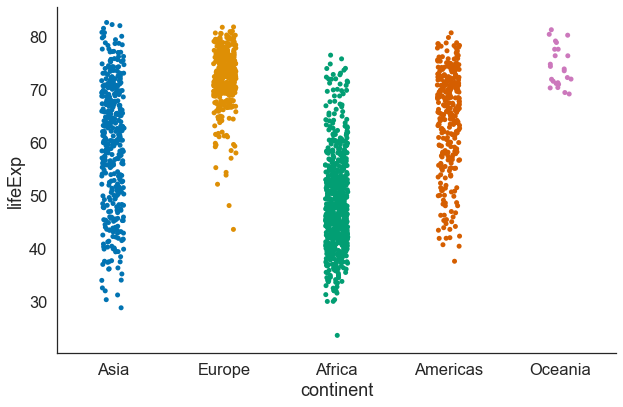

In [19]:
sns.set(font_scale=1.5)
sns.set_palette('colorblind')
sns.set_style("white")
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5)


Text(20.064999999999998, 0.5, 'Life Expectancy')

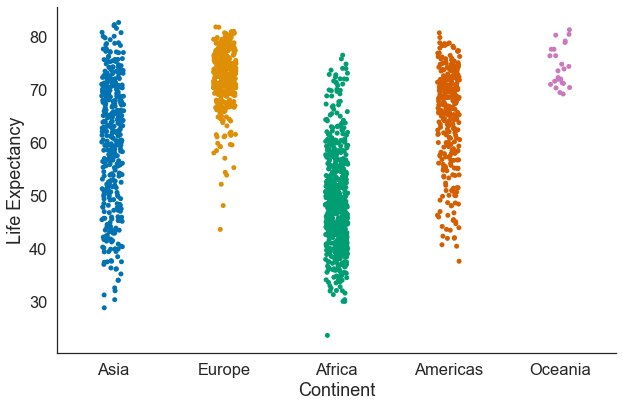

In [20]:
sns.set(font_scale=1.5)
sns.set_palette('colorblind')
sns.set_style("white")
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5)
# Set x-axis label
plt.xlabel('Continent')
# Set y-axis label
plt.ylabel('Life Expectancy')

Text(19.939999999999998, 0.5, 'Life Expectancy')

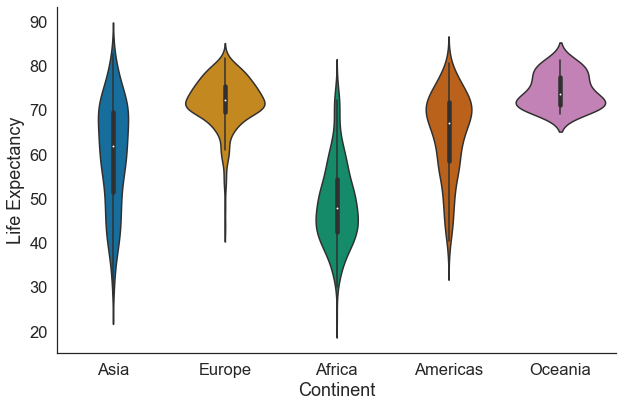

In [21]:
sns.set(font_scale=1.5)
sns.set_palette('colorblind')
sns.set_style("white")
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5,
            kind='violin')
# Set x-axis label
plt.xlabel('Continent')
# Set y-axis label
plt.ylabel('Life Expectancy')

Text(20.064999999999998, 0.5, 'Life Expectancy')

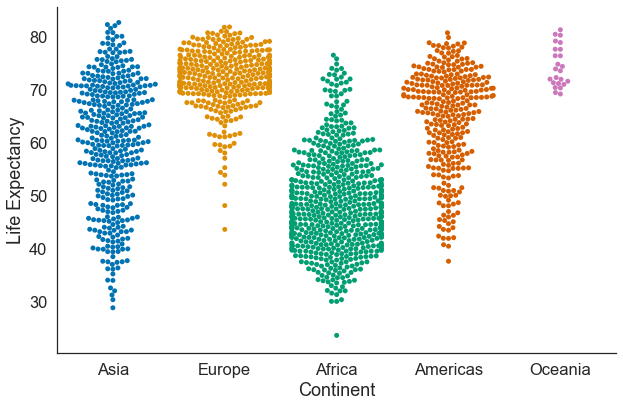

In [22]:
sns.set(font_scale=1.5)
sns.set_palette('colorblind')
sns.set_style("white")
sns.catplot(x='continent', y='lifeExp', 
            data=gapminder, height=6, aspect=1.5,
            kind='swarm')
# Set x-axis label
plt.xlabel('Continent')
# Set y-axis label
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

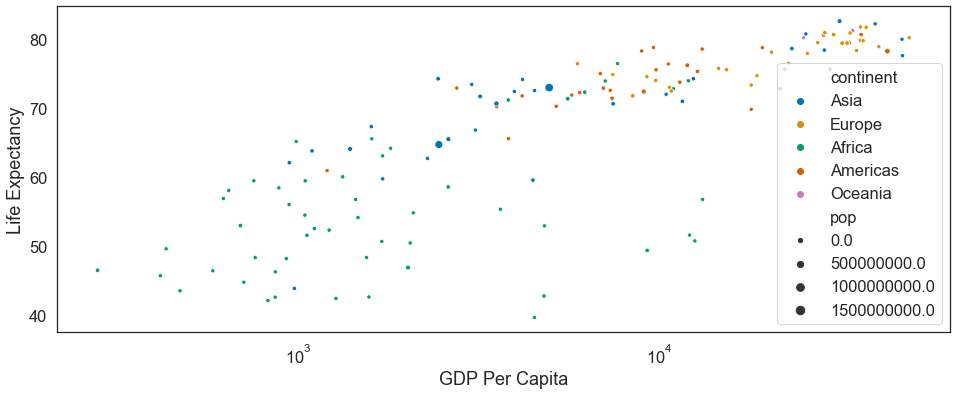

In [27]:
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.5)
sns.set_palette('colorblind')
sns.set_style("white")
plot = sns.scatterplot(x='gdpPercap', y='lifeExp', 
                       size='pop',hue='continent', data=gapminder.loc[gapminder['year'] == 2007])
plot.set(xscale="log")
# Set x-axis label
plt.xlabel('GDP Per Capita')
# Set y-axis label
plt.ylabel('Life Expectancy')


### Lets get interactive with the Plotly library

In [26]:
import plotly.express as px

In [28]:
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()